In [1]:
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [2]:
# Loading the dataset
def load_dataset():
    (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
  
    # Data Visualization
    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # plot raw pixel data
        pyplot.imshow(train_images[i])
        
    print("First Nine Images in TRAIN Dataset:")
    pyplot.show()

    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # plot raw pixel data
        pyplot.imshow(test_images[i])
    
    print("First Nine Images in TEST Dataset:")
    pyplot.show()
    
    # Labels before applying the function
    print("Training set labels:")
    print(train_labels)
    print(train_labels.shape)
  
    print("Testing set labels:")
    print(test_labels)
    print(test_labels.shape)
  
    #Applying the function to training set labels and testing set labels

    train_labels = to_categorical(train_labels, dtype ="uint8")
    test_labels = to_categorical(test_labels, dtype ="uint8")
  
    # Labels after applying the function
    print("Training set labels in Binary Representation:")
    print(train_labels)
    print(train_labels.shape)
  
    print("Testing set labels in Binary Representation:")
    print(test_labels)
    print(test_labels.shape)
    return train_images, train_labels, test_images, test_labels

In [3]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [4]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [6]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    # save model
    model.save('final_model.h5')
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

First Nine Images in TRAIN Dataset:


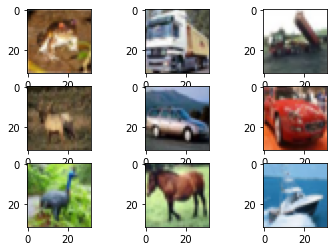

First Nine Images in TEST Dataset:


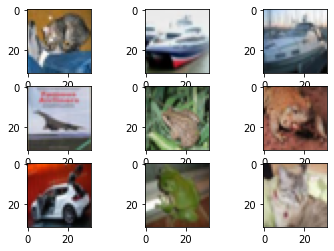

Training set labels:
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
Testing set labels:
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
(10000, 1)
Training set labels in Binary Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(50000, 10)
Testing set labels in Binary Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
(10000, 10)


KeyboardInterrupt: 

In [7]:
run_test_harness()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image-1.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict_classes(img)
    print(result[0])